# Exercici 1

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

Get the dataset you want and perform a pipeline and gridsearch applying the algorithm Random Forest.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
#source: https://www.kaggle.com/datasets/78c7595cbf5a98a8cc488e5b9f6911f216680e5a221e6704ba7be4d7ef42c753

This dataset gathers data about agricultural parameters, such as soil concentrations of nitrogen (N), phosphorous (P), and potassium (K), soil temperature in Celsius degrees, pH, where less than 7 is considered as acidic, more than 7 is considered basic, and at 7 it is considered as neutral, humidity, rainfall, and type of crop(label). The different types of crop are rice, maize, chickpeas, kidney beans, pigeon peas, moth beans, mung beans, blackgram, lentils, pomegranate, banana, mango, grapes, watermelon, muskmelon, apple, orange, papaya, coconut, cotton, jute, and coffee.

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no NaN values that we have to take care of. We will perform a Random Forest classifier to predict the type of crop, that is, to predict label. 

In [3]:
#splitting into test and train

X = df.drop(["label"], axis = 1)
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [4]:
#creating the pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestClassifier(random_state = 42))])

In [5]:
#declaring parameters for gridsearch
space = dict()
space["rf__criterion"] = ["gini", "entropy", "log_loss"]
space["rf__max_depth"] = [5 ,10, 20, 30, None]
space["rf__max_features"] = ["sqrt", "log2"]
space["rf__min_samples_split"] = [2, 5, 10]
space["rf__n_estimators"] = [10, 50, 100, 200, 400, 600]
space["rf__min_samples_leaf"] = [1, 2, 4]


#gridsearch for best roc auc 
search = GridSearchCV(pipe, space, scoring = "accuracy", cv = 5)

result = search.fit(X_train, y_train)

print("Best Hyperparameters: ", result.best_params_)

Best Hyperparameters:  {'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 10}


C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2700 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Nuria\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Nuria\anaconda3\

In [6]:
print("Accuracy score using the best hyperparameters: ", result.best_score_)

Accuracy score using the best hyperparameters:  0.9963636363636363


# Exercici 2 

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

Get a text you want in English and calculate the word frequencies.

In [70]:
#source: https://www.bollywoodhungama.com/movie/morbius-english/critic-review/morbius-english-movie-review/with-a-routine-plot-and-an-unexciting-script-morbius-is-a-weak-fare/

text = """Morbius is the story of a genius doctor trying to cure himself. Michael Morbius (Jared Leto)
is a celebrated doctor who has invented 'artificial blood', which has saved millions of lives 
worldwide. He is handicapped since birth and is trying to find a cure for it. His research leads him 
to conclude that mixing the DNA of bats will be the cure that he's looking for. He manages to trap 
several bats in Costa Rica and secretly brings them to his lab in New York. He begins an experiment 
on a rat and it produces encouraging results. Morbius then along with his colleague, Dr Martine 
Bancroft (Adria Arjona), goes to the international waters in a ship. There, Martine injects himself 
with bat serum. Morbius gets cured of his handicap but also injects himself with a form of vampirism 
instead. In a fit of uncontrolled rage, he ends up killing the ship's crew. Morbius destroys the CCTV
footage and escapes. Meanwhile, Lucian aka Milo (Matt Smith) is a close childhood friend of Morbius 
and is also handicap. Morbius had assured him that he'll cure Milo as well. After the episode on the 
ship, Morbius decides to not use it on Milo. However, Milo is dying to be 'normal' and hence, secretly
injects himself with the serum, leading to madness. What happens next forms the rest of the film.

Matt Sazama and Burk Sharpless' story is okay. Matt Sazama and Burk Sharpless' screenplay is weak. 
The film is filled with ordinary and beaten to death moments that we have already seen in the previous
Marvel and other sci-fi films. The dialogues are nothing special.

Daniel Espinosa's direction fails to save the film. With such a routine storyline, it becomes crucial 
for the execution to be a class apart. Nothing of that sort happens here. Moreover, the way the 
character is connected to the Spider-Man universe looks forced. On the positive side, a few scenes 
are well executed, like Morbius being injected with the bat serum, the fight between Morbius and Milo
in the subway station and the kiss between Morbius and Martine in the climax.

Jared Leto is in a good form. Matt Smith is over the top. Adria Arjona leaves a huge mark. The same 
goes for Charlie Shotwell (Young Michael) and Joseph Esson (Young Milo). Jared Harris (Nicholas) is 
decent in a cameo. Tyrese Gibson (Simon Stroud) is known for his comic timing but in MORBIUS, his 
character is lacklustre. Al Madrigal (Alberto Rodriguez) is wasted. Michael Keaton (Adrian Toomes)’s
cameo fails to generate excitement.

Jon Ekstrand's music is cinematic. Oliver Wood's cinematography is quite nice and keeps the interest 
going. Stefania Cella's production design is very rich. Cindy Evans' costumes are appealing. VFX, as 
expected, is out of the world. Action is minimal and this also goes against the film as one expects a 
lot of fight scenes in such films. Pietro Scalia's editing is passable.

On the whole, MORBIUS emerges as the weakest Marvel film due to the routine plot and unexciting script.
At the box office, it will find it tough to survive due to the limited buzz and negative word of mouth.
"""

In [93]:
from nltk.tokenize import word_tokenize

# break the text into words
token_word = word_tokenize(text)

# remove punctuation
token_word = [word for word in token_word if word.isalnum()]

In [94]:
word_freq

FreqDist({'.': 42, 'the': 32, 'is': 23, ',': 20, 'and': 18, 'to': 17, 'a': 15, 'of': 12, 'Morbius': 11, 'in': 10, ...})

In [95]:
from nltk.probability import FreqDist

word_freq = FreqDist(token_word)

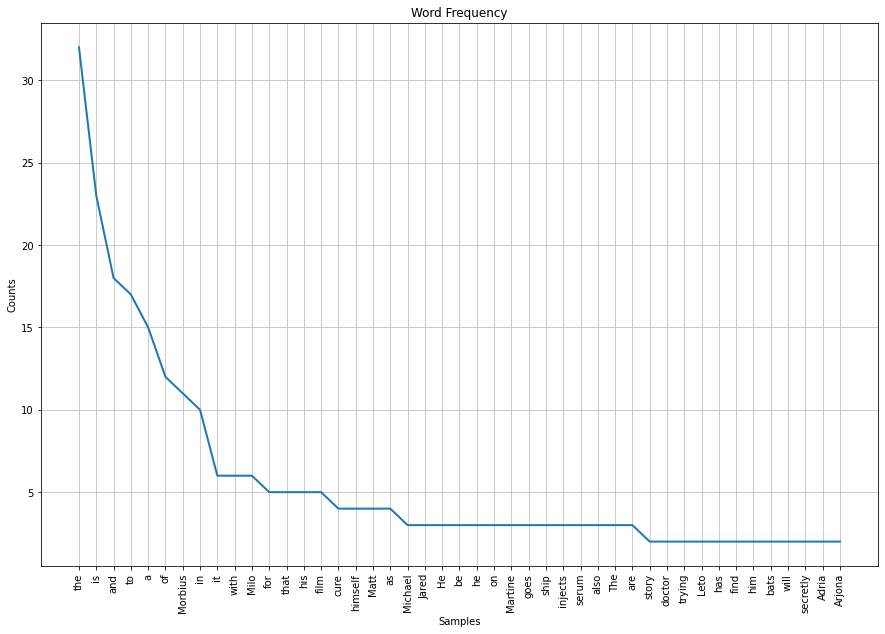

In [96]:
#plotting the word frequency
plt.figure(figsize = (15, 10))
plt.title("Word Frequency")
plt.xlabel("Words")
plt.ylabel("Counts")
word_freq.plot(45, cumulative = False)
plt.show()

The most repeated words are what are called stopwords. They are filler words that do not add substance to the text, they are just pronouns, articles and prepositions, for example.

# Exercici 3

Treu les stop words i realitza stemming al teu conjunt de dades.

Remove the stop words and perform stemming to the dataset.

In [75]:
from nltk.corpus import stopwords

#import english stopwords
stop_words = list(stopwords.words("english"))

In [76]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [98]:
#removing stopwords and punctuation
clean = []
for i in token_word:
    if i not in stop_words:
        clean.append(i)

In [99]:
from nltk.stem import PorterStemmer

#stemming
ps = PorterStemmer()
stemmed = []
for j in clean:
    stemmed.append(ps.stem(j))
print(stemmed)

['morbiu', 'stori', 'geniu', 'doctor', 'tri', 'cure', 'michael', 'morbiu', 'jare', 'leto', 'celebr', 'doctor', 'invent', 'blood', 'save', 'million', 'live', 'worldwid', 'he', 'handicap', 'sinc', 'birth', 'tri', 'find', 'cure', 'hi', 'research', 'lead', 'conclud', 'mix', 'dna', 'bat', 'cure', 'look', 'he', 'manag', 'trap', 'sever', 'bat', 'costa', 'rica', 'secretli', 'bring', 'lab', 'new', 'york', 'he', 'begin', 'experi', 'rat', 'produc', 'encourag', 'result', 'morbiu', 'along', 'colleagu', 'dr', 'martin', 'bancroft', 'adria', 'arjona', 'goe', 'intern', 'water', 'ship', 'there', 'martin', 'inject', 'bat', 'serum', 'morbiu', 'get', 'cure', 'handicap', 'also', 'inject', 'form', 'vampir', 'instead', 'in', 'fit', 'uncontrol', 'rage', 'end', 'kill', 'ship', 'crew', 'morbiu', 'destroy', 'cctv', 'footag', 'escap', 'meanwhil', 'lucian', 'aka', 'milo', 'matt', 'smith', 'close', 'childhood', 'friend', 'morbiu', 'also', 'handicap', 'morbiu', 'assur', 'cure', 'milo', 'well', 'after', 'episod', 'shi

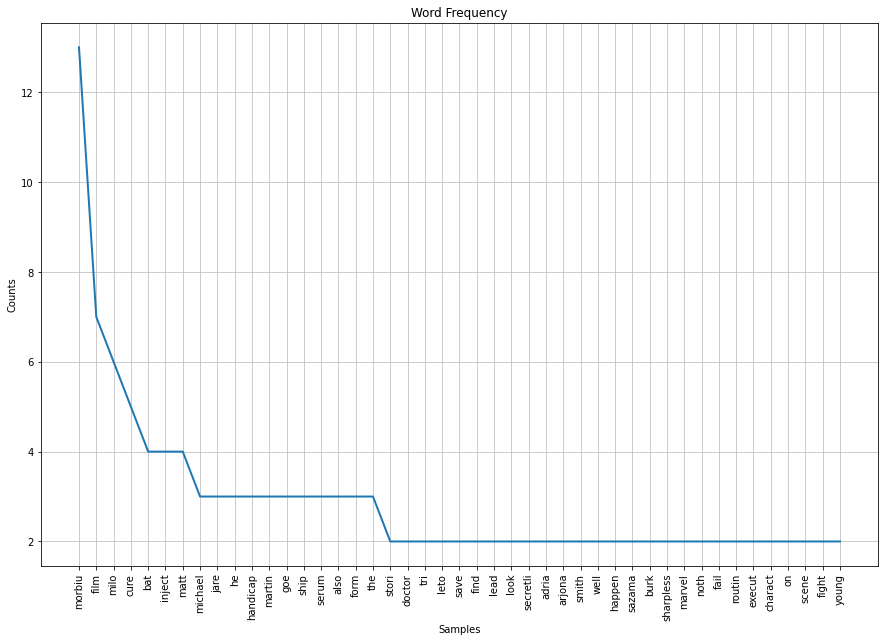

In [100]:
word_freq_stemmed = FreqDist(stemmed)


#plotting the word frequency
plt.figure(figsize = (15, 10))
plt.title("Word Frequency")
plt.xlabel("Words")
plt.ylabel("Counts")
word_freq_stemmed.plot(45, cumulative = False)
plt.show()

This plot is much interesting because it shows the most repeated non-filler words. In this case, the most repeated word is both the name of the movie reviewed and the name of the main character. 

# Exercici 4

Realitza sentiment analysis al teu conjunt de dades.

Perform sentiment analysis on your dataset.

There are two main types of approaches for sentiment analysis, one which is based on supervised learning, and another based on unsupervised lexicon-based learning. The frist approach needs prelabeled data, but the second does not, which is an advantage.  Textblob is a library used for NLP that has special dictionaries (lexicon) that have detailed information, specially curated and prepared just for sentiment analysis. These lexicons have a list of positive and negative polar words with some score associated with them, and using various techniques like the position of words, surrounding words, context, parts of speech, phrases, and so on, scores are assigned to the text documents for which we want to compute the sentiment. After aggregating these scores, we get the final sentiment.

In [108]:
from textblob import TextBlob
sent = TextBlob(text)
print(sent.sentiment)

Sentiment(polarity=0.029743867243867256, subjectivity=0.47087132725430597)


Polarity is a metric used to estimate the overall sentiment of a text, and ranges from -1 to 1, where -1 would be completely negative, 0 is neutral, and 1 is completely positive. In this case, it is very close to 0, so the overall sentiment is neutral.

Subjectivity is a metric that ranges from 0 to 1, where 0 is very objective and 1 is very subjective. In this case, it falls right in the middle. It is a review but also tells parts of the plot, which are objective, so it is understandable.